#**Travel Insurance Prediction**
*Predict Whether A Customer Will Be Interested In Buying Travel Insurance*<br>
sorce: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data



In [110]:
# Import Libraries

from scipy.stats import skew
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [111]:
import warnings
warnings.filterwarnings('ignore')


#Understanding Business Problem
**Problem** : The Company Requires To Know The Which Customers Would Be Interested To Buy Travel Insurance Package.<br>
**Objective** : Customers Prediction.<br>
**Success Metric** : Customers Prediction Accuration > 80%.<br>
**User** : Marketing Team.<br>

### 1. Data Exploration

In [112]:
# Data Extraction

df = pd.read_csv('TravelInsurancePrediction.csv')
df.head()


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### 2. EDA

In [113]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


The data consist of 1987 rows and 9 columns.<br>
there is no missing values.<br> 

Looking from data types, it seems the data has no anomaly values.

In [114]:
df.duplicated().sum()

0

In [115]:
#df["TravelInsurance"] = df["TravelInsurance"].map({0: "not purchased", 1: "purchased"})
#df["ChronicDiseases"] = df["Ch ronicDiseases"].map({0: "No", 1: "Yes"})
#df.drop(columns=('Unnamed: 0'),inplace=True)

##Univariate Analysis

In [116]:
# Split data types

cat = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
num = ['Age', 'AnnualIncome', 'FamilyMembers']

print('cat = ', cat)
print('num = ', num)


cat =  ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
num =  ['Age', 'AnnualIncome', 'FamilyMembers']


In [117]:
df[cat].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employment Type      1987 non-null   object
 1   GraduateOrNot        1987 non-null   object
 2   ChronicDiseases      1987 non-null   int64 
 3   FrequentFlyer        1987 non-null   object
 4   EverTravelledAbroad  1987 non-null   object
 5   TravelInsurance      1987 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 93.3+ KB


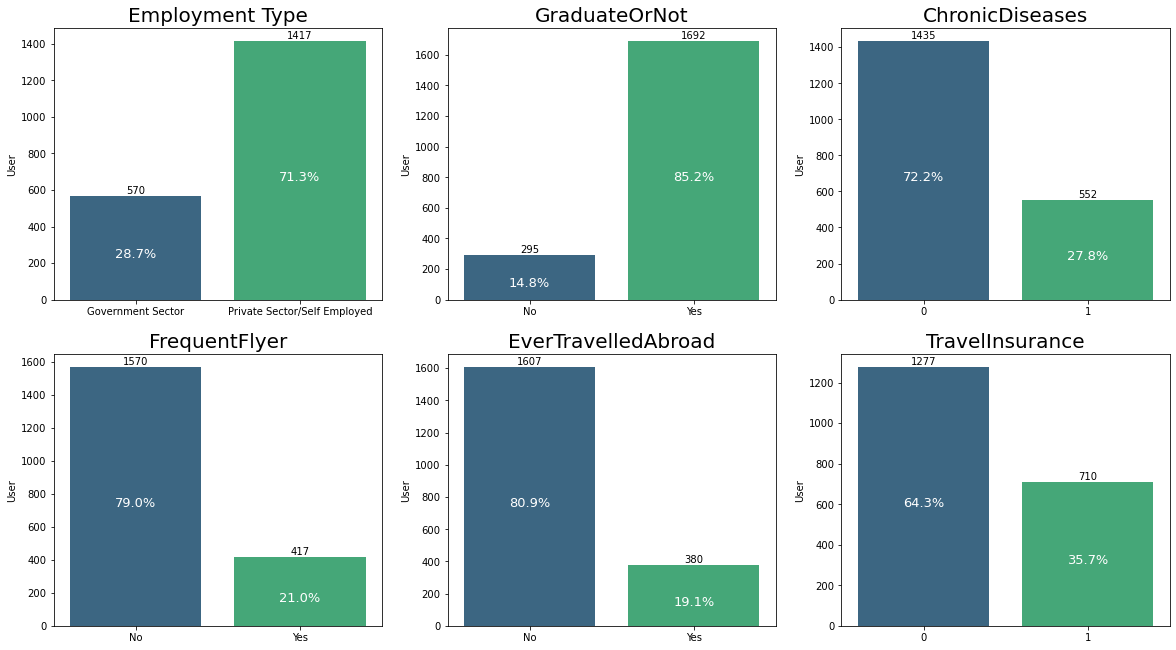

In [118]:
# Categorical-Univariate Analysis

plt.figure(figsize=(20, 11))
for x in range(0, len(cat)):

    dfg = df.groupby([cat[x]])['Age'].count().reset_index(name='User')
    dfg['ratio'] = dfg['User'] / df['Age'].count()
    dfg

    plt.subplot(2, 3, x+1)
    for i, bar in enumerate(sns.barplot(x=cat[x], y='User', palette='viridis', data=dfg).containers):
        for j, value in enumerate(bar):
            number = value.get_height()
            percent = (dfg['ratio'].where(
                dfg['User'] == value.get_height()).sum())*100
            plt.text(value.get_x() + value.get_width() / 2, value.get_height(),
                     round(number), ha='center', va='bottom', fontsize=10)
            plt.text(value.get_x() + value.get_width() / 2, value.get_height()/2,
                     f"{percent:.1f}%", ha='center', va='top', fontsize=13, color='white')
            plt.xlabel('')
            plt.title(cat[x], fontsize=20)
plt.show()


In [119]:
df[cat].describe().T


,count,mean,std,min,25%,50%,75%,max
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


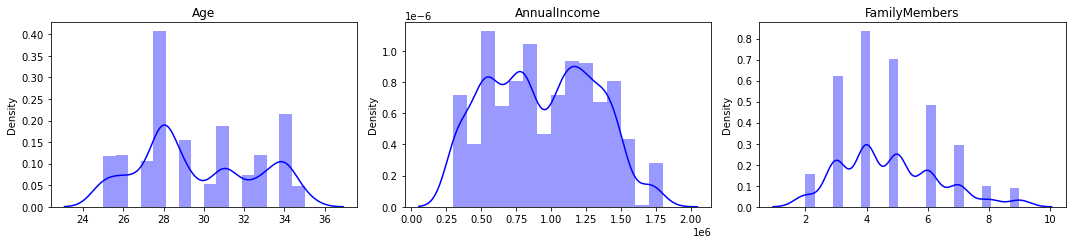

In [120]:
# Numerical-Univariate Analysis

plt.figure(figsize=(15, 3.5))
for x in range(0, len(num)):
    plt.subplot(1, 3, x+1)
    sns.distplot(df[num[x]], color='b')
    plt.title(num[x], fontsize=12)
    plt.xlabel('')
    plt.tight_layout()


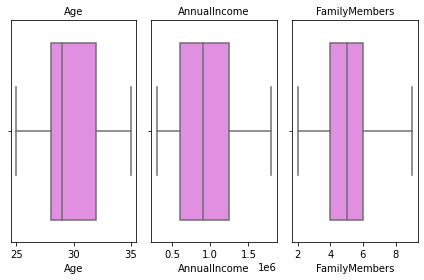

In [121]:
# Outlier Check

plt.figure(figsize=(6, 4))
for x in range(0, len(num)):
    plt.subplot(1, 3, x+1)
    sns.boxplot(df[num[x]], color='violet')
    plt.title(num[x], fontsize=10)
    plt.tight_layout()


In [122]:
df[num].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0


##Bivariate Analysis

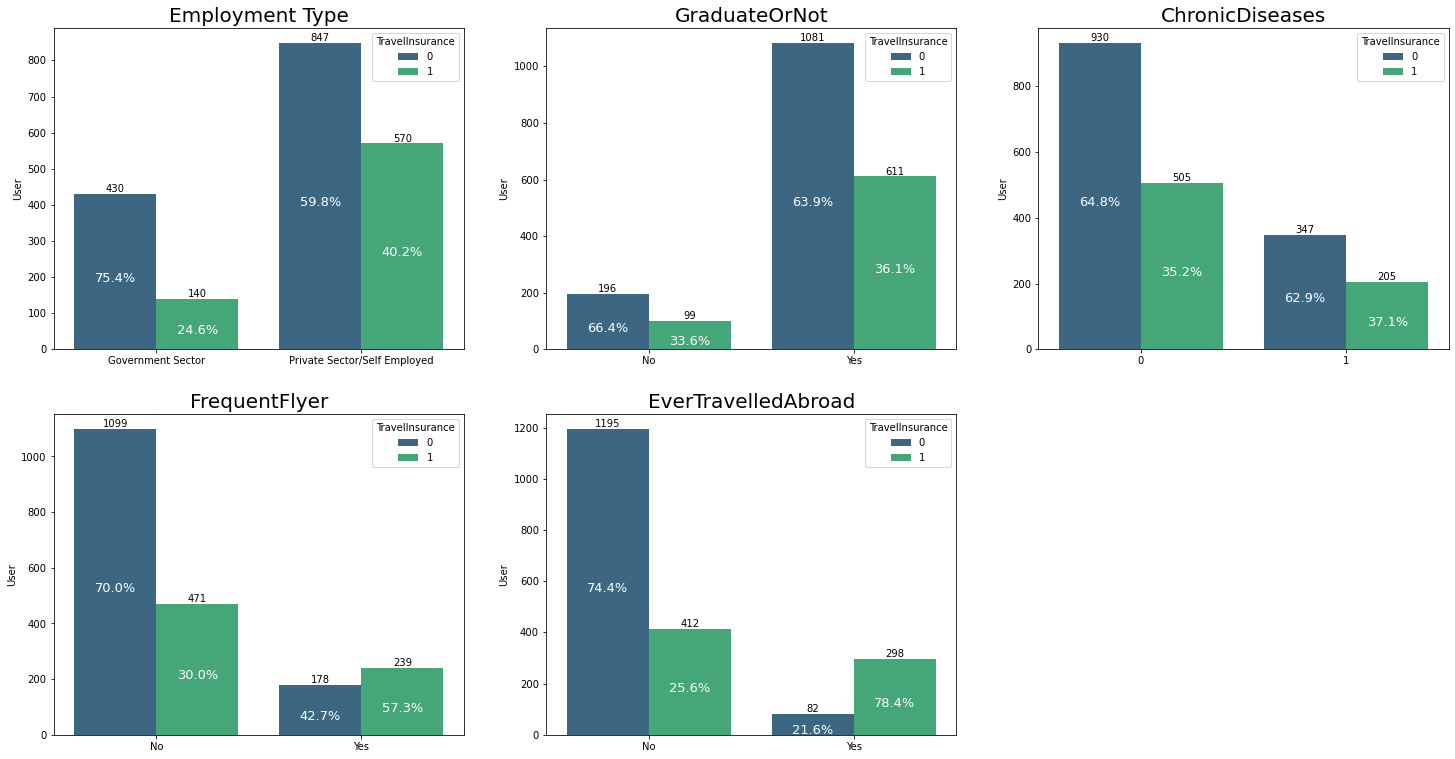

In [123]:
# Categorical-Bivariate Analysis

plt.figure(figsize=(25, 13))
for x in range(0, len(cat)):
    if cat[x] != 'TravelInsurance':
        dfg = df.groupby([cat[x], 'TravelInsurance'])[
            'Age'].count().reset_index(name='User')
        dfg_tot = df.groupby([cat[x]])['Age'].count().reset_index(name='Total')
        dfg = dfg.merge(dfg_tot, how='inner', on=cat[x])
        dfg['ratio'] = dfg['User'] / dfg['Total']
        dfg

        plt.subplot(2, 3, x+1)
        for i, bar in enumerate(sns.barplot(x=cat[x], y='User', hue='TravelInsurance', palette='viridis', data=dfg).containers):
            for j, value in enumerate(bar):
                number = value.get_height()
                percent = (dfg['ratio'].where(
                    dfg['User'] == value.get_height()).sum())*100
                plt.text(value.get_x() + value.get_width() / 2, value.get_height(),
                         round(number), ha='center', va='bottom', fontsize=10)
                plt.text(value.get_x() + value.get_width() / 2, value.get_height()/2,
                         f"{percent:.1f}%", ha='center', va='top', fontsize=13, color='white')
                plt.xlabel('')
                plt.title(cat[x], fontsize=20)
plt.show()


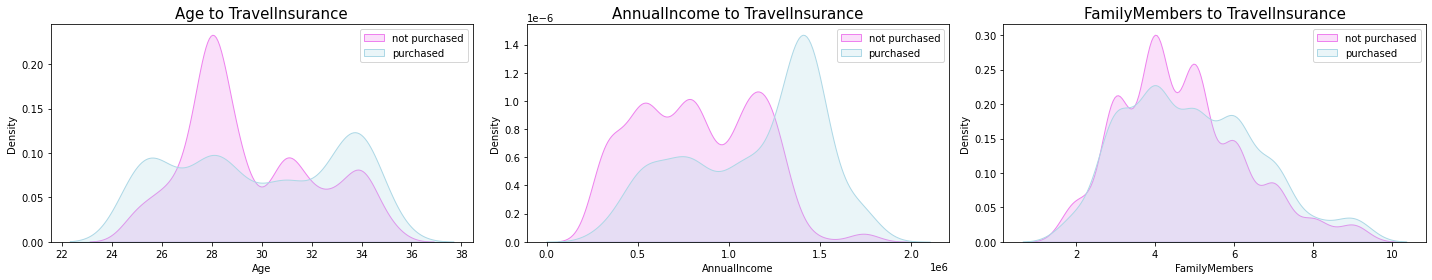

In [124]:
# Numerical-Bivariate Analysis

plt.figure(figsize=(20, 4))
for x in range(0, len(num)):
    plt.subplot(1, 3, x+1)
    ax = sns.kdeplot(df[num[x]][(df["TravelInsurance"] == 0)],
                     color="violet", shade=True)
    ax = sns.kdeplot(df[num[x]][(df["TravelInsurance"] == 1)],
                     ax=ax, color="lightblue", shade=True)
    ax.legend(["not purchased", "purchased"], loc='upper right')
    plt.title(f'{num[x]} to TravelInsurance', fontsize=15)
    plt.tight_layout()


##Multivariate

<AxesSubplot:>

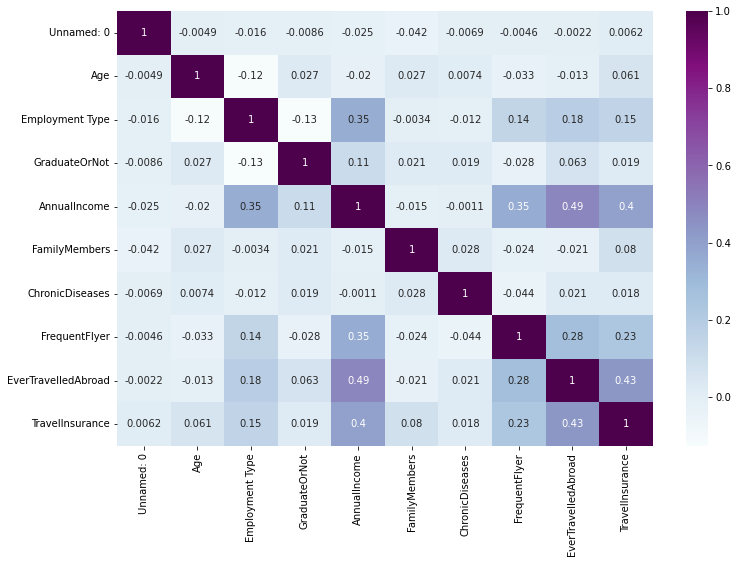

In [125]:
#Heatmap correlation
df_corr = df.copy()
df_corr['Employment Type'] = df_corr['Employment Type'].map({'Private Sector/Self Employed': 1, 'Government Sector': 0})
df_corr['GraduateOrNot'] = df_corr['GraduateOrNot'].map({'Yes': 1, 'No': 0})
df_corr['FrequentFlyer'] = df_corr['FrequentFlyer'].map({'No': 0, 'Yes': 1})
df_corr['EverTravelledAbroad'] = df_corr['EverTravelledAbroad'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(),annot=True, cmap='BuPu')

In [126]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


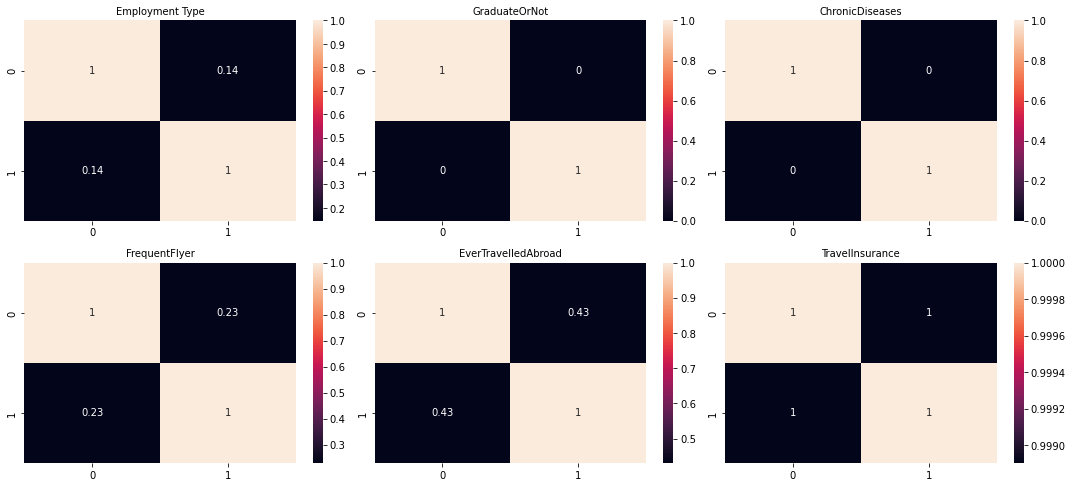

In [127]:
plt.figure(figsize=(15, 10))
for x in range(0, len(cat)):
    plt.subplot(3, 3, x+1)
    corr = cramers_v(df[cat[x]], df["TravelInsurance"])
    sns.heatmap([[1, corr], [corr, 1]], annot=True)
    plt.title(cat[x], fontsize=10)
    plt.tight_layout()


### 3. Data Pre-Processing

#### Data Cleansing

##### Missing, Duplicated and Outliers 

In [128]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [129]:
df.duplicated().sum()


0

##### Feature Transformation and Encoding

In [130]:
df['Employment Type'] = df['Employment Type'].map({'Private Sector/Self Employed': 1, 'Government Sector': 0})
df.rename(columns={'Employment Type' : 'Is_Private_Sector'}, inplace= True)
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})
df['FrequentFlyer'] = df['FrequentFlyer'].map({'No': 0, 'Yes': 1})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'No': 0, 'Yes': 1})
df.head()


,Unnamed: 0,Age,Is_Private_Sector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0


In [131]:
from sklearn.preprocessing import MinMaxScaler

df['AnnualIncome'] = MinMaxScaler().fit_transform(df['AnnualIncome'].values.reshape(len(df), 1))
df['Age'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['FamilyMembers'] = MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))

df.head()


,Unnamed: 0,Age,Is_Private_Sector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,4,0.3,1,1,0.266667,0.857143,1,1,0,0


##### Handling Imbalanced

In [132]:
# Train Test Split

from sklearn.model_selection import train_test_split
df.drop(columns=('Unnamed: 0'),inplace=True)

X = df.drop(['TravelInsurance'], axis=1)
y = df['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=69)


In [133]:
# handling imbalance data
from imblearn import over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)


In [134]:
print('Target(y_train) values :\n0 = not purcashed\n1 = purcashed\n')
print(f'Target before SMOTE:\n{pd.Series(y_train).value_counts()}\n\nTarget after SMOTE:\n{pd.Series(y_over_SMOTE).value_counts()}\n')
print('*'*17, '♥', '*'*17)
print('X_train :')
print(f'\nBefore SMOTE:{X_train.shape}\nAfter  SMOTE:{X_over_SMOTE.shape}')


Target(y_train) values :
0 = not purcashed
1 = purcashed

Target before SMOTE:
0    904
1    486
Name: TravelInsurance, dtype: int64

Target after SMOTE:
0    904
1    904
Name: TravelInsurance, dtype: int64

***************** ♥ *****************
X_train :

Before SMOTE:(1390, 8)
After  SMOTE:(1808, 8)


In [135]:
df.head()

,Age,Is_Private_Sector,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,0.3,1,1,0.266667,0.857143,1,1,0,0


##### Cek data train duplicate

In [136]:
X_train.duplicated().sum()

515

#### Modeling


In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred),"\n")

    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred),"\n")

    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred),"\n")

    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred),"\n")
    
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]),"\n")
    
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()),"\n")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

##### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.78 

Precision (Train Set): 0.78
Precision (Test Set): 0.83 

Recall (Train Set): 0.46
Recall (Test Set): 0.51 

F1-Score (Train Set): 0.58
F1-Score (Test Set): 0.63 

roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.78 

roc_auc (crossval train): 0.9797568527367767
roc_auc (crossval test): 0.7919763942108534 



In [159]:
#Logreg Oversampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_over_SMOTE, y_over_SMOTE) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.75 

Precision (Train Set): 0.62
Precision (Test Set): 0.68 

Recall (Train Set): 0.61
Recall (Test Set): 0.64 

F1-Score (Train Set): 0.62
F1-Score (Test Set): 0.66 

roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.79 

roc_auc (crossval train): 0.979723559076812
roc_auc (crossval test): 0.7922028941418116 



In [139]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.76 

Precision (Train Set): 0.78
Precision (Test Set): 0.84 

Recall (Train Set): 0.41
Recall (Test Set): 0.45 

F1-Score (Train Set): 0.54
F1-Score (Test Set): 0.58 

roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.78 

roc_auc (crossval train): 0.9798833631442635
roc_auc (crossval test): 0.7916499132663628 



In [160]:
#Logreg-Hyper Oversampling
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rs)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.78 

Precision (Train Set): 0.66
Precision (Test Set): 0.75 

Recall (Train Set): 0.57
Recall (Test Set): 0.62 

F1-Score (Train Set): 0.61
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.76
roc_auc (test-proba): 0.78 

roc_auc (crossval train): 0.9798887835485672
roc_auc (crossval test): 0.7907529536902789 



##### KNN

In [140]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Train Set): 0.83
Accuracy (Test Set): 0.78 

Precision (Train Set): 0.83
Precision (Test Set): 0.77 

Recall (Train Set): 0.65
Recall (Test Set): 0.58 

F1-Score (Train Set): 0.73
F1-Score (Test Set): 0.66 

roc_auc (train-proba): 0.88
roc_auc (test-proba): 0.78 

roc_auc (crossval train): 0.9798735785434299
roc_auc (crossval test): 0.7913343819041702 



In [161]:
# knn (oversampling)
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_over_SMOTE, y_over_SMOTE) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.73 

Precision (Train Set): 0.72
Precision (Test Set): 0.63 

Recall (Train Set): 0.79
Recall (Test Set): 0.67 

F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.65 

roc_auc (train-proba): 0.90
roc_auc (test-proba): 0.77 

roc_auc (crossval train): 0.9798112778073186
roc_auc (crossval test): 0.7907309897990887 



In [141]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.80 

Precision (Train Set): 0.83
Precision (Test Set): 0.87 

Recall (Train Set): 0.51
Recall (Test Set): 0.55 

F1-Score (Train Set): 0.64
F1-Score (Test Set): 0.67 

roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.80 

roc_auc (crossval train): 0.9797286562072987
roc_auc (crossval test): 0.7925476064105219 



In [142]:
show_best_hyperparameter(rs)

{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}


In [162]:
#KNN-hyper oversampling
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rs)

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.75 

Precision (Train Set): 0.80
Precision (Test Set): 0.66 

Recall (Train Set): 0.81
Recall (Test Set): 0.69 

F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.67 

roc_auc (train-proba): 0.93
roc_auc (test-proba): 0.77 

roc_auc (crossval train): 0.9798043986214795
roc_auc (crossval test): 0.7890322295291355 



##### Decision Tree

In [143]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.78 

Precision (Train Set): 0.97
Precision (Test Set): 0.74 

Recall (Train Set): 0.80
Recall (Test Set): 0.65 

F1-Score (Train Set): 0.88
F1-Score (Test Set): 0.69 

roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.76 

roc_auc (crossval train): 0.9796422061071837
roc_auc (crossval test): 0.7924010006731567 



In [163]:
# decision tree (oversampling)
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_over_SMOTE, y_over_SMOTE) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.78 

Precision (Train Set): 0.97
Precision (Test Set): 0.73 

Recall (Train Set): 0.80
Recall (Test Set): 0.65 

F1-Score (Train Set): 0.88
F1-Score (Test Set): 0.69 

roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.75 

roc_auc (crossval train): 0.9797968364437762
roc_auc (crossval test): 0.7905754410038662 



In [144]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Train Set): 0.81
Accuracy (Test Set): 0.80 

Precision (Train Set): 0.80
Precision (Test Set): 0.79 

Recall (Train Set): 0.60
Recall (Test Set): 0.63 

F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.70 

roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.80 

roc_auc (crossval train): 0.9797930759391658
roc_auc (crossval test): 0.7952751959058271 



In [145]:
# decision tree-hyper (oversampling)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.80 

Precision (Train Set): 0.84
Precision (Test Set): 0.79 

Recall (Train Set): 0.62
Recall (Test Set): 0.63 

F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.70 

roc_auc (train-proba): 0.84
roc_auc (test-proba): 0.79 

roc_auc (crossval train): 0.9798998359361757
roc_auc (crossval test): 0.7899750586854459 



In [146]:
show_best_hyperparameter(model)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


##### Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.80 

Precision (Train Set): 0.94
Precision (Test Set): 0.78 

Recall (Train Set): 0.83
Recall (Test Set): 0.64 

F1-Score (Train Set): 0.88
F1-Score (Test Set): 0.70 

roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.81 

roc_auc (crossval train): 0.9797461644540204
roc_auc (crossval test): 0.7903625336578294 



In [164]:
#Random Forest (oversample)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rf)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.79 

Precision (Train Set): 0.92
Precision (Test Set): 0.75 

Recall (Train Set): 0.85
Recall (Test Set): 0.67 

F1-Score (Train Set): 0.88
F1-Score (Test Set): 0.70 

roc_auc (train-proba): 0.98
roc_auc (test-proba): 0.81 

roc_auc (crossval train): 0.9798152132779773
roc_auc (crossval test): 0.7920430302402651 



In [148]:
# tuning hyperparameter RF 
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.83 

Precision (Train Set): 0.91
Precision (Test Set): 0.92 

Recall (Train Set): 0.59
Recall (Test Set): 0.60 

F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.73 

roc_auc (train-proba): 0.86
roc_auc (test-proba): 0.82 

roc_auc (crossval train): 0.9796604736086948
roc_auc (crossval test): 0.791226536609362 



In [149]:
show_best_hyperparameter(rs)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 14, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 147, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [150]:
# tuning hyperparameter RF + oversampling 
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rs)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.82 

Precision (Train Set): 0.91
Precision (Test Set): 0.88 

Recall (Train Set): 0.65
Recall (Test Set): 0.61 

F1-Score (Train Set): 0.76
F1-Score (Test Set): 0.72 

roc_auc (train-proba): 0.90
roc_auc (test-proba): 0.82 

roc_auc (crossval train): 0.9798738172868806
roc_auc (crossval test): 0.7916445948978182 



##### AdaBoost

In [151]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.79 

Precision (Train Set): 0.90
Precision (Test Set): 0.87 

Recall (Train Set): 0.54
Recall (Test Set): 0.53 

F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.66 

roc_auc (train-proba): 0.81
roc_auc (test-proba): 0.80 

roc_auc (crossval train): 0.9798333201549199
roc_auc (crossval test): 0.7900105720104944 



In [165]:
#AdaBoost Oversample
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(clf)

Accuracy (Train Set): 0.83
Accuracy (Test Set): 0.79 

Precision (Train Set): 0.87
Precision (Test Set): 0.81 

Recall (Train Set): 0.60
Recall (Test Set): 0.58 

F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.81
roc_auc (test-proba): 0.79 

roc_auc (crossval train): 0.9798481448577693
roc_auc (crossval test): 0.7906770509700359 



In [152]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [1641], # Jumlah iterasi
                       learning_rate = [0.09204020100502513],  
                       algorithm = ['SAMME.R'],
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Train Set): 0.81
Accuracy (Test Set): 0.79 

Precision (Train Set): 0.89
Precision (Test Set): 0.86 

Recall (Train Set): 0.53
Recall (Test Set): 0.53 

F1-Score (Train Set): 0.67
F1-Score (Test Set): 0.66 

roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.80 

roc_auc (crossval train): 0.9798098429844899
roc_auc (crossval test): 0.791739883233223 



In [153]:
show_best_hyperparameter(ab_tuned)

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.09204020100502514, 'n_estimators': 1641, 'random_state': 42}


In [166]:
#AdaBoost-hyper Oversample
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [1641], # Jumlah iterasi
                       learning_rate = [0.09204020100502513],  
                       algorithm = ['SAMME.R'],
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring='recall')
ab_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.78 

Precision (Train Set): 0.83
Precision (Test Set): 0.77 

Recall (Train Set): 0.59
Recall (Test Set): 0.57 

F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.66 

roc_auc (train-proba): 0.81
roc_auc (test-proba): 0.79 

roc_auc (crossval train): 0.979723526681941
roc_auc (crossval test): 0.7922215138256007 



##### XGBoost

In [154]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.79 

Precision (Train Set): 0.95
Precision (Test Set): 0.76 

Recall (Train Set): 0.74
Recall (Test Set): 0.63 

F1-Score (Train Set): 0.83
F1-Score (Test Set): 0.69 

roc_auc (train-proba): 0.96
roc_auc (test-proba): 0.81 

roc_auc (crossval train): 0.9797459270603562
roc_auc (crossval test): 0.7921972845035902 



In [167]:
#XGBoost oversample
xg = XGBClassifier()
xg.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(xg)

Accuracy (Train Set): 0.90
Accuracy (Test Set): 0.79 

Precision (Train Set): 0.93
Precision (Test Set): 0.76 

Recall (Train Set): 0.77
Recall (Test Set): 0.64 

F1-Score (Train Set): 0.84
F1-Score (Test Set): 0.69 

roc_auc (train-proba): 0.96
roc_auc (test-proba): 0.81 

roc_auc (crossval train): 0.9798126043097974
roc_auc (crossval test): 0.7903954363435515 



In [155]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.80 

Precision (Train Set): 0.90
Precision (Test Set): 0.80 

Recall (Train Set): 0.68
Recall (Test Set): 0.62 

F1-Score (Train Set): 0.78
F1-Score (Test Set): 0.70 

roc_auc (train-proba): 0.93
roc_auc (test-proba): 0.80 

roc_auc (crossval train): 0.9796074823486421
roc_auc (crossval test): 0.7930601439519469 



In [175]:
#XGBoost-hyper oversample
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.79 

Precision (Train Set): 0.88
Precision (Test Set): 0.76 

Recall (Train Set): 0.73
Recall (Test Set): 0.64 

F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.70 

roc_auc (train-proba): 0.93
roc_auc (test-proba): 0.82 

roc_auc (crossval train): 0.9798578049408171
roc_auc (crossval test): 0.7904879306476111 



<h4>NaiveBayes Classifier

In [168]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.79 

Precision (Train Set): 0.88
Precision (Test Set): 0.76 

Recall (Train Set): 0.73
Recall (Test Set): 0.64 

F1-Score (Train Set): 0.80
F1-Score (Test Set): 0.70 

roc_auc (train-proba): 0.93
roc_auc (test-proba): 0.82 

roc_auc (crossval train): 0.9798287615891639
roc_auc (crossval test): 0.7910876225490195 



In [156]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
ynb_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != ynb_pred).sum()))

Number of mislabeled points out of a total 597 points : 143


In [157]:
eval_classification(gnb)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.76 

Precision (Train Set): 0.68
Precision (Test Set): 0.74 

Recall (Train Set): 0.50
Recall (Test Set): 0.56 

F1-Score (Train Set): 0.58
F1-Score (Test Set): 0.64 

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.77 

roc_auc (crossval train): 0.979882414919393
roc_auc (crossval test): 0.7916058776063243 



In [176]:
gnb = GaussianNB()
ynb_pred = gnb.fit(X_over_SMOTE, y_over_SMOTE).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != ynb_pred).sum()))
eval_classification(gnb)

Number of mislabeled points out of a total 597 points : 152
Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.75 

Precision (Train Set): 0.63
Precision (Test Set): 0.69 

Recall (Train Set): 0.53
Recall (Test Set): 0.58 

F1-Score (Train Set): 0.58
F1-Score (Test Set): 0.63 

roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.77 

roc_auc (crossval train): 0.9797350368158261
roc_auc (crossval test): 0.7907032005143607 



#### Features Importance

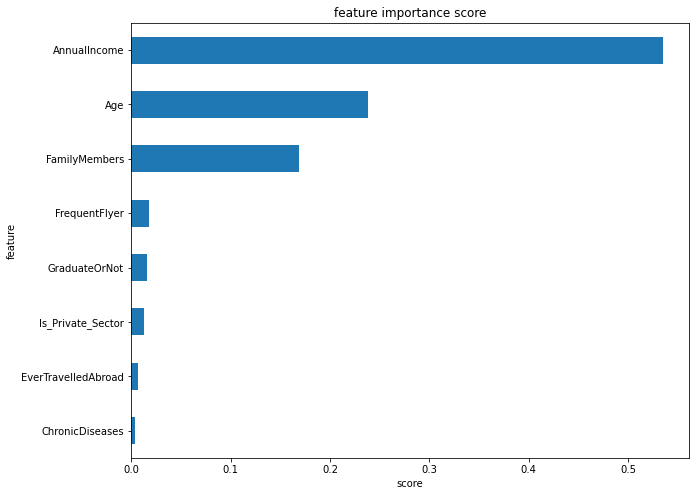

In [158]:
show_feature_importance(ab_tuned.best_estimator_)